In [22]:
import numpy as np
import time
import pickle
import os
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.neural_network import MLPClassifier as mlp_classifier

warnings.filterwarnings('ignore')

In [79]:
print("----------------Reading the Data-------------------------")
PATH = os.getcwd()
os.chdir('Alphabets/')

X_train = pd.read_csv('train.csv', sep=',', header=None, index_col=False)
X_test = pd.read_csv('test.csv', sep=',', header=None, index_col=False)
np.random.shuffle(X_train.to_numpy())
train_class = X_train[X_train.columns[-1]]
test_actual_class = X_test[X_test.columns[-1]]

X_train = X_train.drop(X_train.columns[-1], axis=1)
X_test = X_test.drop(X_test.columns[-1], axis=1)

print("----------------Data Reading completed-------------------")

os.chdir('../')

X_train = X_train/255
X_test = X_test/255

m = X_train.shape[0] # Number of Training Samples
n = X_train.shape[1] # Number of input features

print("The total number of training samples = {}".format(m))
print("The number of features = {}".format(n))

----------------Reading the Data-------------------------
----------------Data Reading completed-------------------
The total number of training samples = 13000
The number of features = 784


In [80]:
#To get the one hot encoding of each label
print("--------Perform 1-hot encoding of class labels------------")

train_class_enc = pd.get_dummies(train_class).to_numpy()
test_actual_class_enc = pd.get_dummies(test_actual_class).to_numpy()

--------Perform 1-hot encoding of class labels------------


In [154]:
clf = mlp_classifier(hidden_layer_sizes=(100, 100), activation='relu', solver='sgd', 
                     batch_size=100, learning_rate_init=0.1, learning_rate='invscaling', 
                     power_t=(1/3), tol=1e-8, verbose=True)

In [155]:
start =time.time()
clf.fit(X_train, train_class_enc)
end = time.time()

Iteration 1, loss = 2.46417404
Iteration 2, loss = 1.01992657
Iteration 3, loss = 0.81536931
Iteration 4, loss = 0.77851207
Iteration 5, loss = 0.75572888
Iteration 6, loss = 0.73796624
Iteration 7, loss = 0.72334086
Iteration 8, loss = 0.71218142
Iteration 9, loss = 0.70064552
Iteration 10, loss = 0.69125728
Iteration 11, loss = 0.68277751
Iteration 12, loss = 0.67406916
Iteration 13, loss = 0.66685300
Iteration 14, loss = 0.65977961
Iteration 15, loss = 0.65315232
Iteration 16, loss = 0.64710666
Iteration 17, loss = 0.64067599
Iteration 18, loss = 0.63506290
Iteration 19, loss = 0.62972459
Iteration 20, loss = 0.62411218
Iteration 21, loss = 0.61970439
Iteration 22, loss = 0.61427293
Iteration 23, loss = 0.60930250
Iteration 24, loss = 0.60536176
Iteration 25, loss = 0.60023547
Iteration 26, loss = 0.59583602
Iteration 27, loss = 0.59236336
Iteration 28, loss = 0.58844662
Iteration 29, loss = 0.58481195
Iteration 30, loss = 0.58113326
Iteration 31, loss = 0.57681007
Iteration 32, los

In [156]:
print(clf.loss_)
# print(clf.intercepts_)
# print(clf.coefs_)
print(clf.out_activation_)


0.3263119236371492
logistic


In [157]:
print("The time taken to train the model using MLP classifier is = {:2.3f}sec".format(end-start))
print("The test accuracy of the model ={:2.3f}%".format(clf.score(X_test, test_actual_class_enc)*100))

The time taken to train the model using MLP classifier is = 153.347sec
The test accuracy of the model =82.554%


In [84]:
print("The time taken to train the model using MLP classifier is = {:2.3f}sec".format(end-start))
print("The test accuracy of the model ={:2.3f}%".format(clf.score(X_test, test_actual_class_enc)*100))

The time taken to train the model using MLP classifier is = 83.778sec
The test accuracy of the model =88.185%


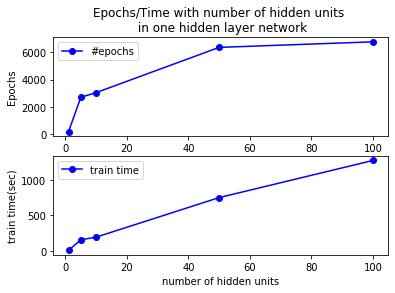

In [55]:
fig = plt.figure()
ax = fig.add_subplot(211)
plt.title("Epochs/Time with number of hidden units \n in one hidden layer network")
ax.plot(arch_test, epochs, c='b', marker='o', label='#epochs')
ax.set_xlabel("number of hidden units")
ax.set_ylabel("Epochs")
ax.legend()

ax1 = fig.add_subplot(212)
ax1.plot(arch_test, train_time, c='b', marker='o', label='train time')
ax1.set_xlabel("number of hidden units")
ax1.set_ylabel("train time(sec)")
plt.legend()
#plt.savefig("epochs_time_HiddenUnit_val20per.png", dpi=1000, bbox_inches='tight')
plt.show()